# Drill: Present the same data multiple ways
Find a dataset you'd like to explore. This can be something you're familiar with or something new.

* Choose one variable and plot that variable four different ways.
* Choose two continuous variables, and plot them three different ways.
* Choose one continuous variable and one categorical variable, and plot them six different ways.
* Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

# The Dataset:
Levin Vehicle Telematics
Vehicle and Driving Data
* https://www.kaggle.com/yunlevin/levin-vehicle-telematics/version/3#v2.csv
* https://github.com/YunSolutions/levin-openData


#### Context
The dataset is proprietary data of Yun Solutions, collected from Beta Testing phase. The dataset contains sensor and OBD data for over 4 months and around 30 vehicles.

1. Device Id – Each device has a unique identifier. Device and Car is one to one mapping 
2. Time Stamp – Time stamp refers to time. The value corresponds to data collected in that very second. Format – Year – Month – Day Hrs:Min:Sec 
3. Trip ID – The trip id corresponds to 1 trip, Trip begins when engine is switched on and end when car engine is switched off. 
4. accData – Refers to Accelerometer and Magnetometer sensor data. The data is collected from the OBD device, values are in terms of G-force. The data is across X, Y, Z axis where X-axis is horizontal, Y- axis is vertical and Z-axis is the direction of movement of the car. The data is provided in raw format. To extract values, please use following formular 
5. gps_speed – The speed in kmph as noted from GPS sensor 
6. battery – The battery voltage corresponds to voltage of the battery installed in Car, which supplies electrical energy to a motor vehicle. 
7. cTemp – The Temperature of the engine coolant of an internal combustion engine. The normal operating temperature for most engines is in a range of 90 to 104 degree Celsius (195 to 220 degrees Fahrenheit) 
8. dtc – Number of diagnostic trouble codes. DTC's, or Diagnostic Trouble Codes, are used by automobile manufacturers to diagnose problems related to the vehicle. 
9. eLoad - Engine load measures how much air (and fuel) you're sucking into the engine and then compares that value to the theoretical maximum. 
10. iat - The Intake Air Temperature sensor (IAT) has been utilised as an Engine Control Unit (ECU) input signal, as a requirement for calculating the Air Mass volume for the incoming air charge. This is, to assist in determining the correct engine fuel requirement to suit the operating air temperature. 
11. imap - The manifold absolute pressure sensor (MAP sensor) is one of the sensors used in an internal combustion engine's electronic control system. The manifold absolute pressure sensor provides instantaneous manifold pressure information to the engine's electronic control unit (ECU). The data is used to calculate air density and determine the engine's air mass flow rate, which in turn determines the required fuel metering for optimum combustion (see stoichiometry) and influence the advance or retard of ignition timing. 
12. kpl – KMPL is mileage in kilometres per litre. It is a derived metric derived from speed and fuel to air mass flow ratio. This ratio is constant in case of Petrol cars while changes for other Fuel types. Hence, the KMPL value is accurate for petrol cars, and contain some error in case of other fuel types. 
13. maf - A mass (air) flow sensor (MAF) is used to find out the mass flow rate of air entering a fuel-injected internal combustion engine. The air mass information is necessary for the engine control unit (ECU) to balance and deliver the correct fuel mass to the engine. 
14. rpm – RPM here means engine RPM. 
15. speed – Speed data as collected from OBD device mounted in the car. 
16. tAdv – Timing advance refers to the number of degrees before top dead center (BTDC) that the spark will ignite the air-fuel mixture in the combustion chamber during the compression stroke. 
17. tPos – Refers to throttle position  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
df = pd.read_csv("telematic_v2.csv")
df = df[df['gps_speed'] != 'gps_speed']

In [85]:
df.describe()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
count,3120240,3120240.0,3120240,3120240,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0,3120240.0
unique,693,23.0,1740022,1811224,13641.0,996.0,268.0,5.0,518.0,163.0,643.0,169554.0,11607.0,21705.0,415.0,305.0,508.0
top,67,12.0,2017-12-30 11:48:32,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,34488,655360.0,10,425984,649936.0,1970863.0,513870.0,2399305.0,680665.0,513825.0,513935.0,1034334.0,794353.0,600135.0,832334.0,1984426.0,1542214.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120240 entries, 0 to 3120271
Data columns (total 17 columns):
tripID       object
deviceID     object
timeStamp    object
accData      object
gps_speed    object
battery      object
cTemp        object
dtc          object
eLoad        object
iat          object
imap         object
kpl          object
maf          object
rpm          object
speed        object
tAdv         object
tPos         object
dtypes: object(17)
memory usage: 428.5+ MB


In [152]:
# Convert to right dtype
df['gps_speed'] = pd.to_numeric(df['gps_speed'])
df['gps_speed'].describe()

count    3.120240e+06
mean     2.410440e+01
std      2.619350e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.703840e+01
75%      3.759560e+01
max      5.122262e+02
Name: gps_speed, dtype: float64

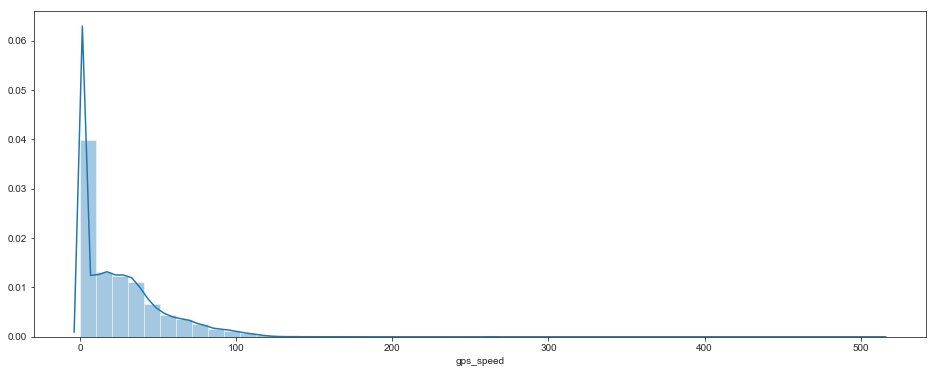

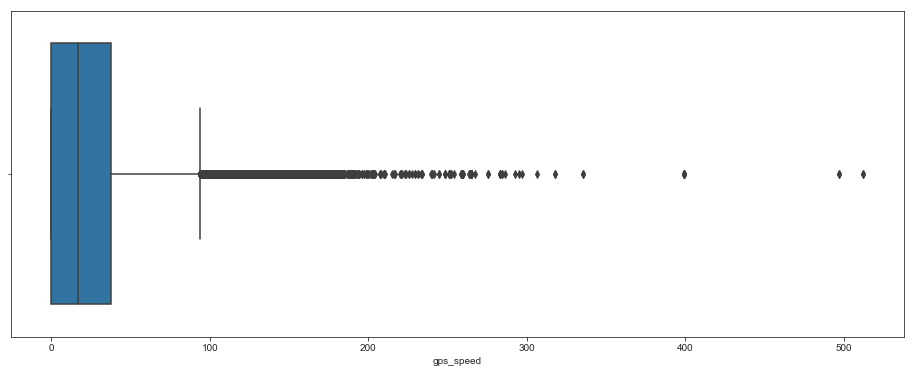

In [153]:
sns.set_style('ticks')
plt.figure(figsize=(16, 6))
sns.distplot(df.gps_speed)
plt.show()

plt.figure(figsize=(16, 6))
sns.boxplot(df.gps_speed)
plt.show()

plt.figure(figsize=(16, 6))
sns.scatterplot(palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df.gps_speed)
plt.show()

plt.figure(figsize=(16, 6))
sns.violinplot(data=df.gps_speed, inner="points")
plt.show()

In [156]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])#, format='%Y-%m-%d')
df.dtypes

tripID               object
deviceID             object
timeStamp    datetime64[ns]
accData              object
gps_speed           float64
battery              object
cTemp                object
dtc                  object
eLoad                object
iat                  object
imap                 object
kpl                  object
maf                  object
rpm                  object
speed                object
tAdv                 object
tPos                 object
dtype: object

In [157]:
df.describe()

,gps_speed
count,3.120240e+06
mean,2.410440e+01
std,2.619350e+01
min,0.000000e+00
25%,0.000000e+00
50%,1.703840e+01
75%,3.759560e+01
max,5.122262e+02


In [158]:
df['timeStamp'].sample(5)

702090    2017-12-02 13:45:43
1341317   2017-12-14 19:26:06
852231    2017-11-22 07:41:49
1004483   2017-11-29 20:37:58
2049018   2018-01-02 18:43:21
Name: timeStamp, dtype: datetime64[ns]

KeyboardInterrupt: 

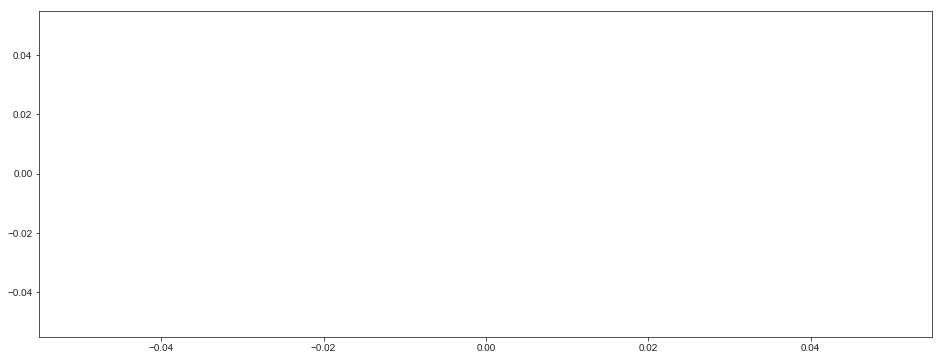

In [160]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="timeStamp", y="gps_speed", data=df)

# Challenge
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups
* Accompany your plot with a written description of what you see.

## Appendix

In [2]:
#### Formulae for conversion of hex data
def convert_acc(x): x = int(x,16) if x>127: x = x-256 return np.float64(x*0.01536)

def convert_mag(x): x = int(x,16) if x>32767: x = x-65536 return np.float64(x*0.0366)

##Convert Raw data to engineering units
acc_data = pd.DataFrame()
j = 0
for acc_sample in data:
    if len(acc_sample) == 162:
        mx = convert_mag(acc_sample[0:4])
        my = convert_mag(acc_sample[4:8])
        mz = convert_mag(acc_sample[8:12])
        acc_sample = acc_sample[12:]
        for i in range(0, len(acc_sample), 6):
            x = convert_acc(acc_sample[i:i+2])
            y = convert_acc(acc_sample[i+2:i+4])
            z = convert_acc(acc_sample[i+4:i+6])

            # Apply rotation matrix and store the values
            A = np.array([[x], [y], [z]])
            B = np.dot(R,A)
            x,y,z = B[:,0]
            df = pd.DataFrame({'x':x, 'y':y, 'z':z}, index=[i/6+j])
            acc_data = acc_data.append(df)
        j += 25

SyntaxError: invalid syntax (<ipython-input-2-8c70ed30860a>, line 2)